11 October 2023

# Plotting

Plotting with `pandas` for preliminary visual exploration of data.

## Glacial Data

In [2]:
import pandas as pd

df = pd.read_csv('glacial_loss.csv')

df.head()

,year,europe,arctic,alaska,asia,north_america,south_america,antarctica,global_glacial_volume_change,annual_sea_level_rise,cumulative_sea_level_rise
0,1961,-5.128903,-108.382987,-18.721190,-32.350759,-14.359007,-4.739367,-35.116389,-220.823515,0.610010,0.610010
1,1962,5.576282,-173.252450,-24.324790,-4.675440,-2.161842,-13.694367,-78.222887,-514.269862,0.810625,1.420635
2,1963,-10.123105,-0.423751,-2.047567,-3.027298,-27.535881,3.419633,3.765109,-550.575640,0.100292,1.520927
3,1964,-4.508358,20.070148,0.477800,-18.675385,-2.248286,20.732633,14.853096,-519.589859,-0.085596,1.435331
4,1965,10.629385,43.695389,-0.115332,-18.414602,-19.398765,6.862102,22.793484,-473.112003,-0.128392,1.306939


### `plot()` method

<AxesSubplot:>

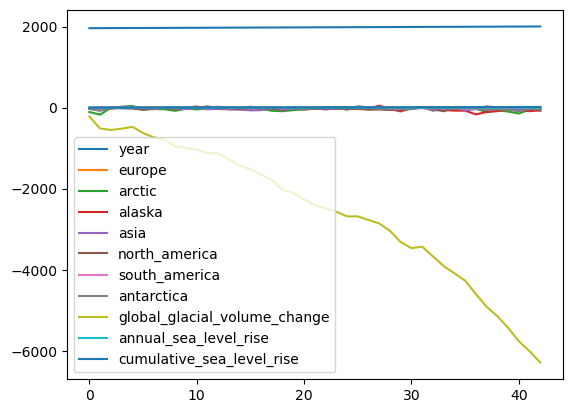

In [3]:
df.plot()

Without specifying parameters it 
- creates one line plot for each column with numeric data
- sets the values of the index as the x-axis values

### Line Plots

<AxesSubplot:xlabel='year'>

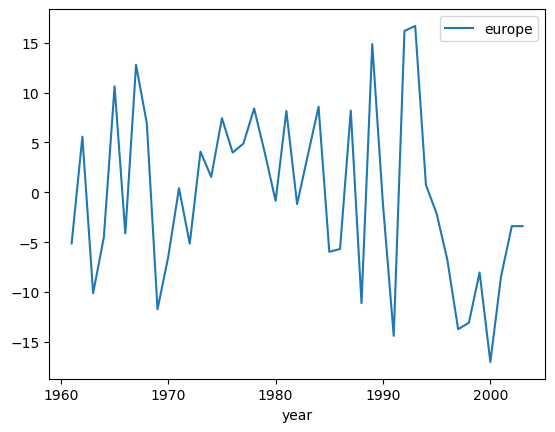

In [4]:
# change in glacial volume per year in Europe
df.plot(x='year', y='europe')

Can also do some basic customization to make it a bit nicer

<AxesSubplot:title={'center':'Change in glacial volume per year in Europe'}, xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>

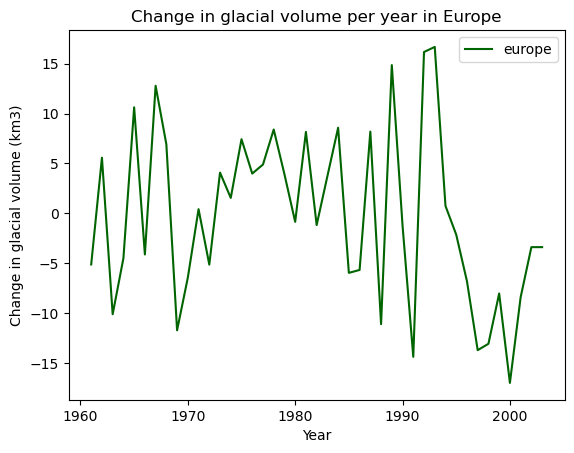

In [6]:
df.plot(x='year', 
        y='europe',
        title='Change in glacial volume per year in Europe',
        xlabel='Year',
        ylabel='​Change in glacial volume (km3​)',
        color='darkgreen'
        )

### Multiple line plots

We can do it by updating these arguments:
- **y** : a list of column names that will be plotted against x
- **color**: specify the color of each column’s line with a dictionary {'col_1' : 'color_1', 'col_2':'color_2}

<AxesSubplot:title={'center':'Change in glacial volume per year in Alaska and the Arctic'}, xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>

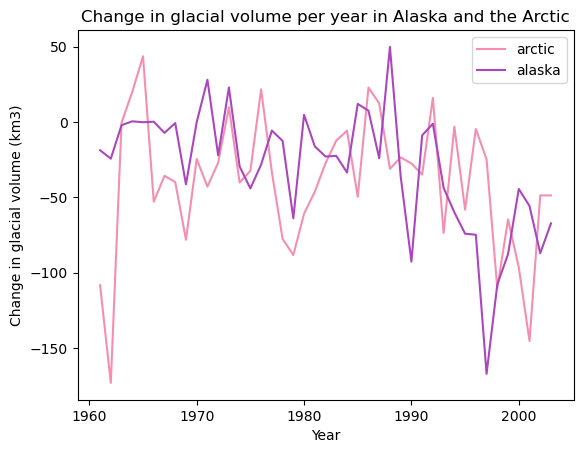

In [ ]:
df.plot(x='year', 
        y=['arctic', 'alaska'],
        title = 'Change in glacial volume per year in Alaska and the Arctic',
        xlabel='Year',
        ylabel='​Change in glacial volume (km3​)',        
        color = {'arctic':'#F48FB1',
                 'alaska': '#AB47BC'
                 }
        )

#### Faceting

array([<AxesSubplot:xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>,
       <AxesSubplot:xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>],
      dtype=object)

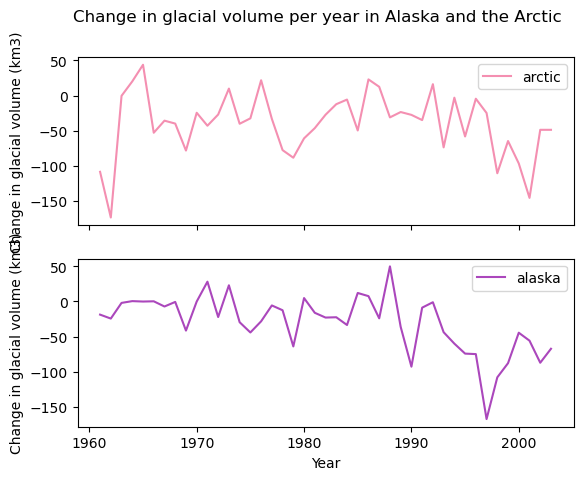

In [8]:
df.plot(x='year', 
        y=['arctic', 'alaska'],
        title = 'Change in glacial volume per year in Alaska and the Arctic',
        xlabel='Year',
        ylabel='​Change in glacial volume (km3​)',        
        color = {'arctic':'#F48FB1',
                 'alaska': '#AB47BC'
                 },
        subplots=True
        )

### Practice Check-in

1. Plot a graph of the annual sea level rise with respect to the years.

2. What information is the `columns` variable retrieving from the data frame? Describe in a sentence what is being plotted.

<AxesSubplot:xlabel='year'>

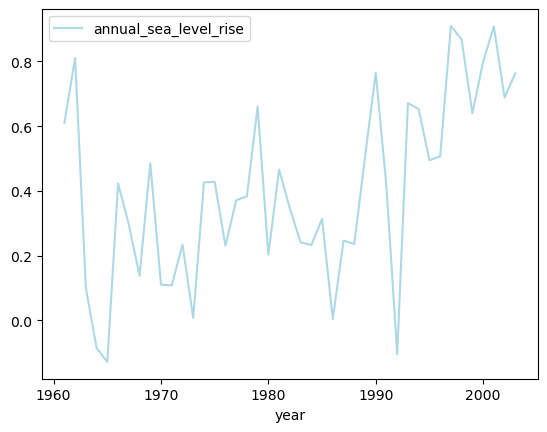

In [15]:
df.plot(x='year', 
        y='annual_sea_level_rise',
       color = 'lightblue')

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

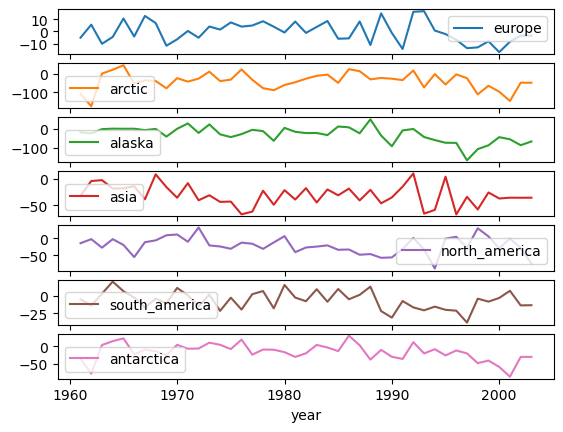

In [9]:
columns = df.loc[:,'europe':'antarctica'].columns

df.plot(x='year', 
        y=columns, 
        subplots=True)

`columns` is a list of the column names that we want to plot, in this case, Europe to Antarctica. We can call this list in y = to tell it to plot all of those columns. 

## Palmer Penguins

In [10]:
# read in data
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

# look at dataframe's head
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [11]:
# simple statistics about numeric columns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [12]:
# get count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [13]:
# get unique values in species column
print(penguins.species.unique())

# species unique value counts 
print(penguins.species.value_counts())

['Adelie' 'Gentoo' 'Chinstrap']
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


### `kind` argument in `plot()`

The parameter that controls this behaviour is plot()’s kind parameter. By changing the value of kind we can create different kinds of plots. 

### Scatter plots

<AxesSubplot:title={'center':'Flipper length and body mass for Palmer penguins'}, xlabel='Flipper length (mm)', ylabel='Body mass (g)'>

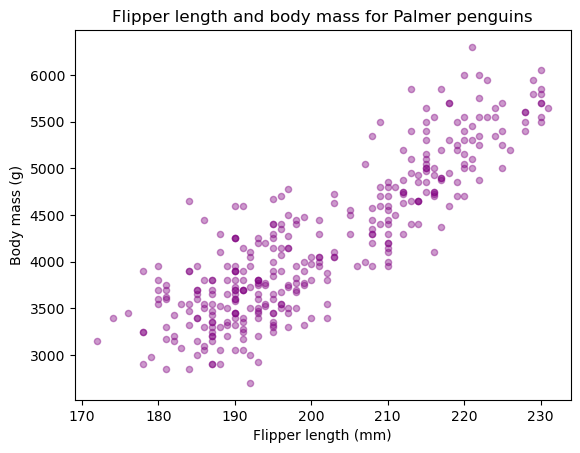

In [19]:
penguins.plot(kind='scatter',
        x='flipper_length_mm', 
        y='body_mass_g',
        color = 'purple',
        title='Flipper length and body mass for Palmer penguins',
        xlabel='Flipper length (mm)',
        ylabel='Body mass (g)',
        alpha=0.4)

### Bar plots

We can create bar plots of our data setting `kind='bar'` in the `plot()` method.

For example, let’s say we want to get data about the 10 penguins with lowest body mass. We can first select this data using the `nsmallest()` method for series:

In [20]:
smallest = penguins.body_mass_g.nsmallest(10).sort_values()
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

<AxesSubplot:>

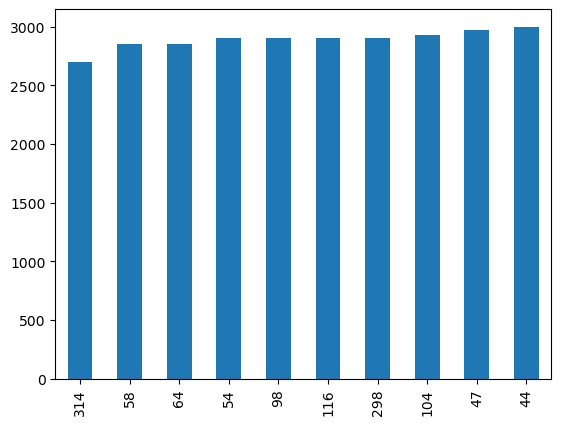

In [21]:
smallest.plot(kind='bar')

### Histograms

We can create a histogram of our data setting `kind='hist'` in `plot()`.

<AxesSubplot:ylabel='Frequency'>

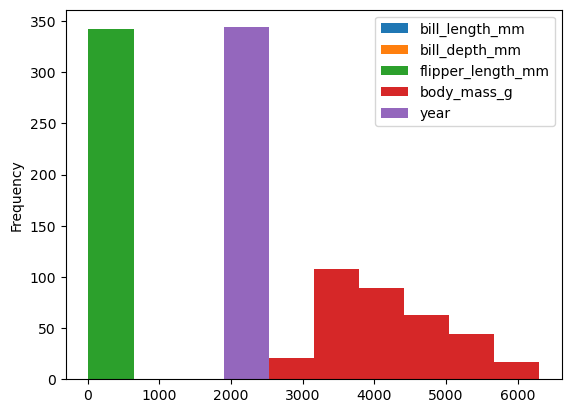

In [22]:
# using plot without subsetting data - a mess again
penguins.plot(kind='hist')

<AxesSubplot:title={'center':'Penguin flipper lengths'}, ylabel='Frequency'>

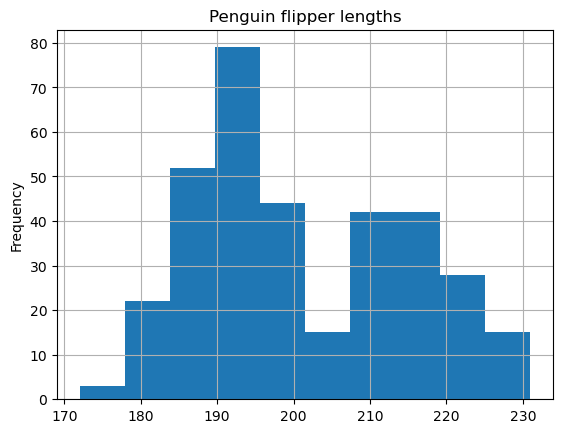

In [23]:
# distribution of flipper length measurements
# first select data, then plot
penguins.flipper_length_mm.plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

## Practice Check-in

1. Select the `bill_length_mm` and `bill_depth_mm` columns in the penguins dataframe and then update the kind parameter to box to make boxplots of the bill length and bill depth.

2. Select both rows and columns to create a histogram of the flipper length of gentoo penguins.

<AxesSubplot:>

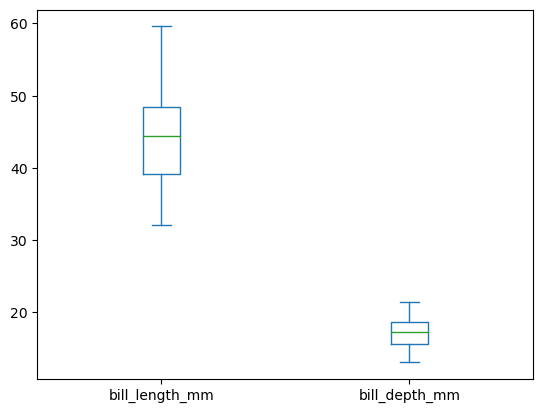

In [54]:
cols = penguins[['bill_length_mm','bill_depth_mm']]

cols.plot(kind = 'box')

<AxesSubplot:title={'center':'Gentoo Penguin Flipper Length (mm) Frequency '}, ylabel='Frequency'>

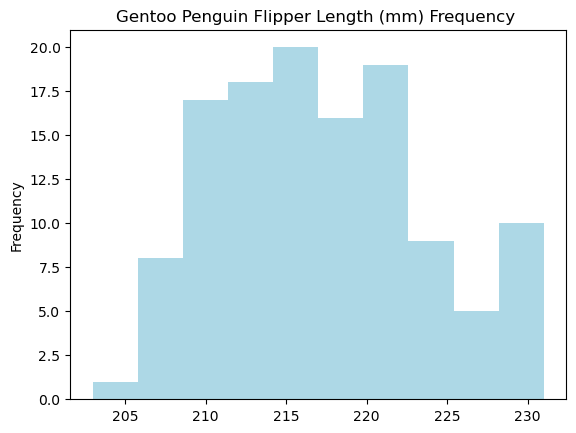

In [49]:
gentoos = penguins[penguins.species == "Gentoo"]

gentoos.flipper_length_mm.plot(kind = 'hist',
                                xlabel='Flipper length (mm)',
                               color = 'lightblue',
                              title = 'Gentoo Penguin Flipper Length (mm) Frequency ')

## Grouping

Our penguins data is naturally split into different groups: there are three different species, two sexes and three islands. Often, we want to calculate a certain statistic for each group. For example, suppose we want to calculate the average flipper length per species. How would we do this “by hand”?

- We start with our data and notice there are multiple species in the species column.

1. We split our original table to group all observations from the same species together.

2. We calculate the average flipper length for each of the groups we formed.

3. Then we combine the values for average flipper length per species into a single table.

This is known as the Split-Apply-Combine strategy. This strategy follows the three steps we explained above:

1. **Split**: Split the data into logical groups (e.g. species, sex, island, etc.)

2. **Apply**: Calculate some summary statistic on each group (e.g. average flipper length by species, number of individuals per island, body mass by sex, etc.)

3. **Combine:** Combine the statistic calculated on each group back together.

`df.groupby(columns_to_group_by)`

In [36]:
# without grouping
penguins.flipper_length_mm.mean()

200.91520467836258

In [37]:
# average flipper length per species
penguins.groupby("species").flipper_length_mm.mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

<AxesSubplot:title={'center':'Average flipper length by species'}, xlabel='species', ylabel='Flipper length (mm)'>

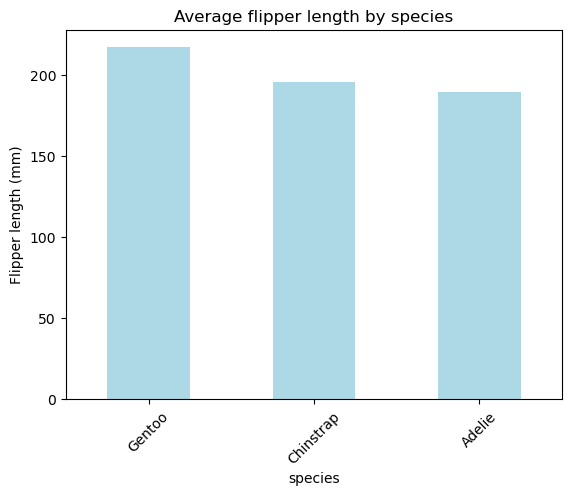

In [43]:
# average flipper length per species
avg_flipper = penguins.groupby("species").flipper_length_mm.mean()

# sort in descending order
# remember to reassign to actually update data
avg_flipper = avg_flipper.sort_values(ascending=False)

# plot as a bar plot
avg_flipper.plot(kind='bar',
                 title='Average flipper length by species',
                 ylabel='Flipper length (mm)',
                 color = "lightblue",
                 rot=45  # rotation for ticks 
                 ) 

In [44]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

<AxesSubplot:xlabel='island,year'>

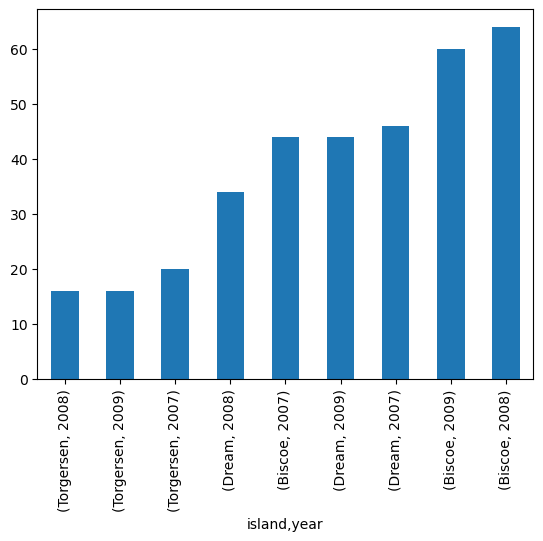

In [45]:
penguins.groupby(['island','year']).count().species.sort_values().plot(kind='bar')

## Practice Check-in

1. Use groupby and the max() method for data frames to calculate the maximum value of penguin’s body mass by year and species.

2. Use (1) to display the highest body masses per year and species as a bar plot in descending order.